In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import association_rules,apriori

# 1. Đọc dữ liệu

In [2]:
df = pd.read_csv('D:\DATA\Online_Retail.csv')
df.head()

<>:1: DeprecationWarning: invalid escape sequence '\D'
<>:1: DeprecationWarning: invalid escape sequence '\D'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3740\1776541967.py:1: DeprecationWarning: invalid escape sequence '\D'
  df = pd.read_csv('D:\DATA\Online_Retail.csv')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

dữ liệu có 541909 bản ghi và 8 cột

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 2. Tiền xử lý dữ liệu

In [5]:
# Đếm số lượng cột có giá trị null
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Ta thấy ở cột Description có tất cả 1454 giá trị null và CustomerID có 135080 giá trị null
<br>
Vì vậy ta cần xóa bỏ các bản ghi có Description giá trị null vì điều này có thể gây ảnh hưởng tới quá trình tìm ra luật kết hợp
<br>Còn các bản ghi  có CustomerID null thì sẽ đặt là "Uknowns"để không làm mất đi các giao dịch và làm tăng độ chỉnh xác của luật kết hợp

In [6]:
# xóa bản ghi có Description=null
df = df.dropna(subset=['Description'])
# đặt các bản ghi CustomerID=null thành "Uknowns"
df['CustomerID'].fillna('unknown', inplace=True)

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
# kiểm tra Quantity và UnitPrice có giá trị âm không
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [8]:
df[df['UnitPrice']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,unknown,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,unknown,United Kingdom


In [9]:
print(len(df))
# loại bỏ những Quantity và UnitPrice có giá trị âm
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]
print(len(df))


540455
530104


# loại bỏ outline bằng biều đồ Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1e2031d1890>,
 'caps': [<matplotlib.lines.Line2D at 0x1e200bb3490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e203164490>],
 'medians': [<matplotlib.lines.Line2D at 0x1e2031dcc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e203165610>],
 'means': []}

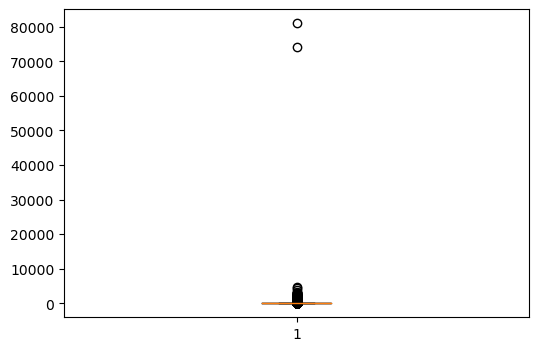

In [10]:
# xem biểu đồ boxplot tìm ra outline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize']=(6,4)
plt.boxplot(df.Quantity)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e2014698d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e20146b4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e2013e8a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1e201474c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e201475690>],
 'means': []}

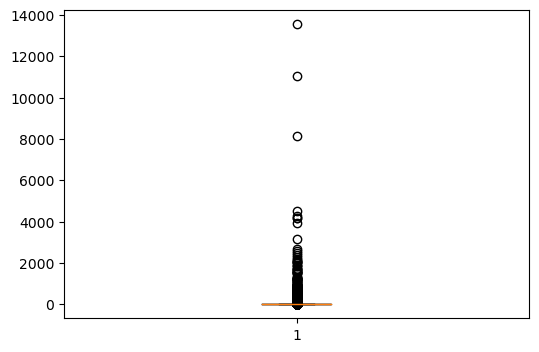

In [11]:
matplotlib.rcParams['figure.figsize']=(6,4)
plt.boxplot(df.UnitPrice)

In [12]:
    # Loại bỏ outliers
    q_low = df["Quantity"].quantile(0.25) # Calculate percentiles
    q_hi  = df["Quantity"].quantile(0.75)

    IQR=q_hi-q_low

    # Filter out outliers
    df=df[~((df['Quantity']<(q_low-1.5*IQR)) | (df['Quantity']>(q_hi+1.5*IQR)))]


q_low = df["UnitPrice"].quantile(0.25)
q_hi  = df["UnitPrice"].quantile(0.75)

IQR=q_hi-q_low

# Filter out outliers
df=df[~((df['UnitPrice']<(q_low-1.5*IQR)) | (df['UnitPrice']>(q_hi+1.5*IQR)))]

{'whiskers': [<matplotlib.lines.Line2D at 0x1e2014b3d10>,
 'caps': [<matplotlib.lines.Line2D at 0x1e2014c1650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e2014ae090>],
 'medians': [<matplotlib.lines.Line2D at 0x1e2014c2c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e2014a3610>],
 'means': []}

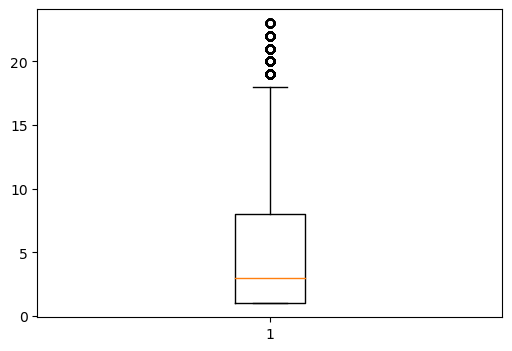

In [13]:
# sau khi bỏ outlier
matplotlib.rcParams['figure.figsize']=(6,4)
plt.boxplot(df.Quantity)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e20215a890>,
 'caps': [<matplotlib.lines.Line2D at 0x1e20216c890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e2014d9f90>],
 'medians': [<matplotlib.lines.Line2D at 0x1e20216ddd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e202167bd0>],
 'means': []}

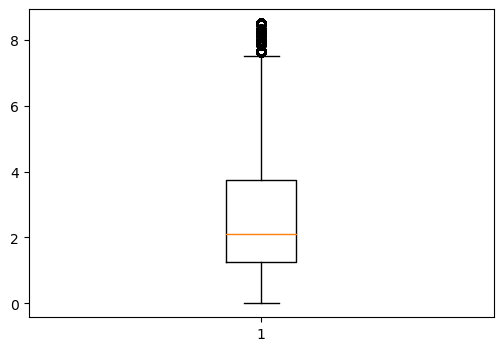

In [14]:
matplotlib.rcParams['figure.figsize']=(6,4)
plt.boxplot(df.UnitPrice)

# 3. Phân tích khám phá dữ liệu

In [15]:
df.describe()

,Quantity,UnitPrice
count,442666.000000,442666.000000
mean,4.904070,2.784289
std,4.495069,2.036175
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,8.000000,3.750000
max,23.000000,8.500000


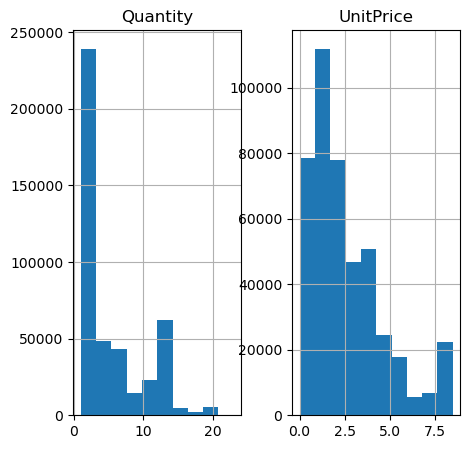

In [16]:

# Histograms for numerical features
df.hist(figsize=(5, 5), bins=10)
plt.show()

In [17]:

# Creating a 'TotalPrice' column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [18]:
# Aggregating data per customer
customer_df = df[df['CustomerID']!='unknown'].groupby('CustomerID')['TotalPrice'].sum()


customer_df=customer_df.sort_values(ascending=False)
customer_df

CustomerID
14911.0    78186.73
14096.0    38290.66
17841.0    32125.19
13089.0    27538.69
12748.0    19786.62
             ...   
16966.0        3.25
14101.0        2.95
16446.0        2.90
12643.0        2.00
17942.0        1.90
Name: TotalPrice, Length: 4170, dtype: float64

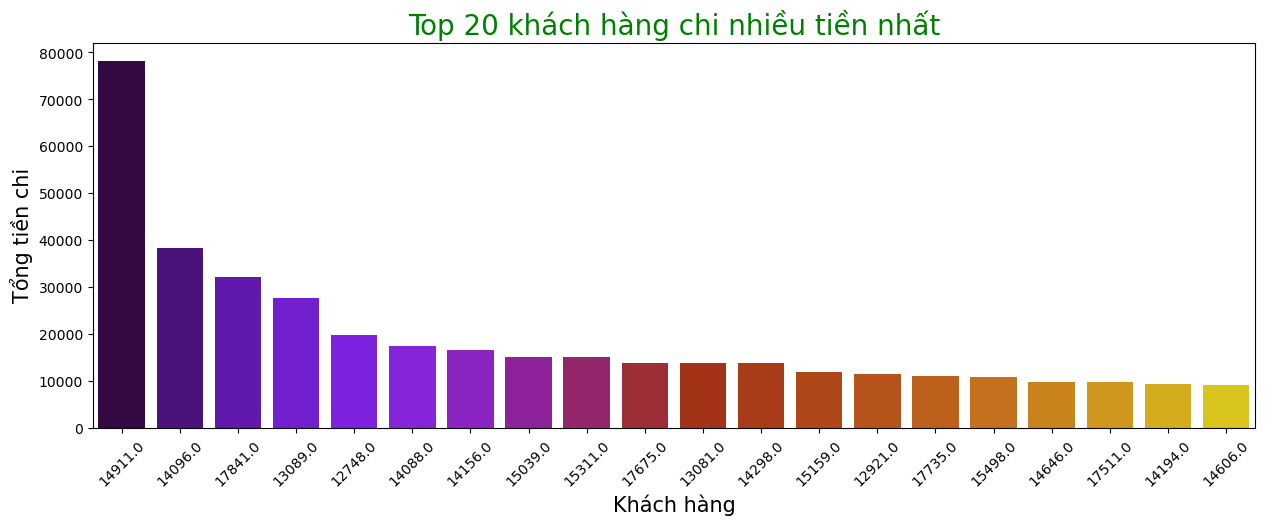

In [19]:

customer_df.index= customer_df.index.astype('str')
plt.figure(figsize=(15,5))
sns.barplot(x = customer_df.head(20).index, y = customer_df.head(20).values, palette = 'gnuplot')
plt.xlabel('Khách hàng', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Tổng tiền chi', size = 15)
plt.title('Top 20 khách hàng chi nhiều tiền nhất', color = 'green', size = 20)
plt.show()



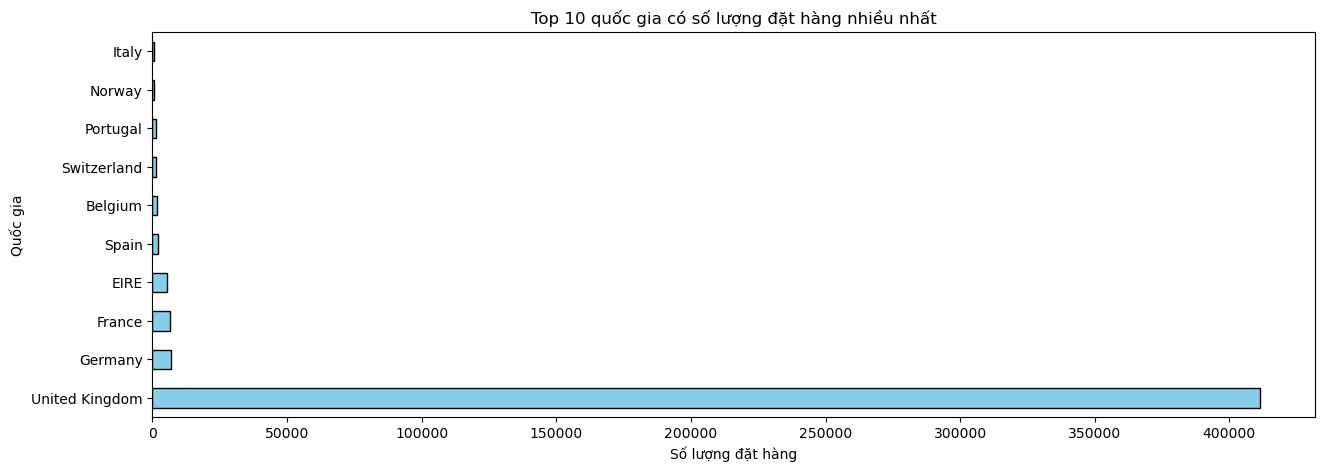

In [20]:

plt.figure(figsize=(15,5))
count_Country = df.groupby('Country')['InvoiceNo'].count()
count_Country.sort_values(ascending=False).head(10).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 quốc gia có số lượng đặt hàng nhiều nhất')
plt.xlabel('Số lượng đặt hàng')
plt.ylabel('Quốc gia')
plt.show()


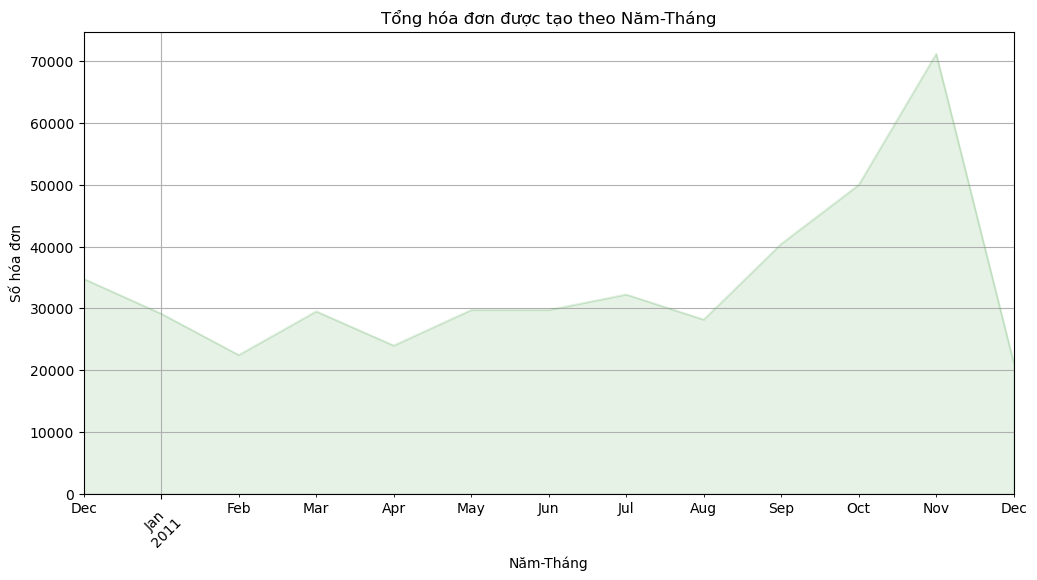

In [21]:
plt.figure(figsize=(12, 6))
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')  # new column for Year-Month
number_of_invoices_per_month = df.groupby('YearMonth')['InvoiceNo'].count()
number_of_invoices_per_month.plot(kind='area', color='green', alpha=0.1)

plt.xlabel('Năm-Tháng')
plt.ylabel('Số hóa đơn')
plt.title('Tổng hóa đơn được tạo theo Năm-Tháng')
plt.xticks(rotation=45)
plt.grid(True)  
plt.show()

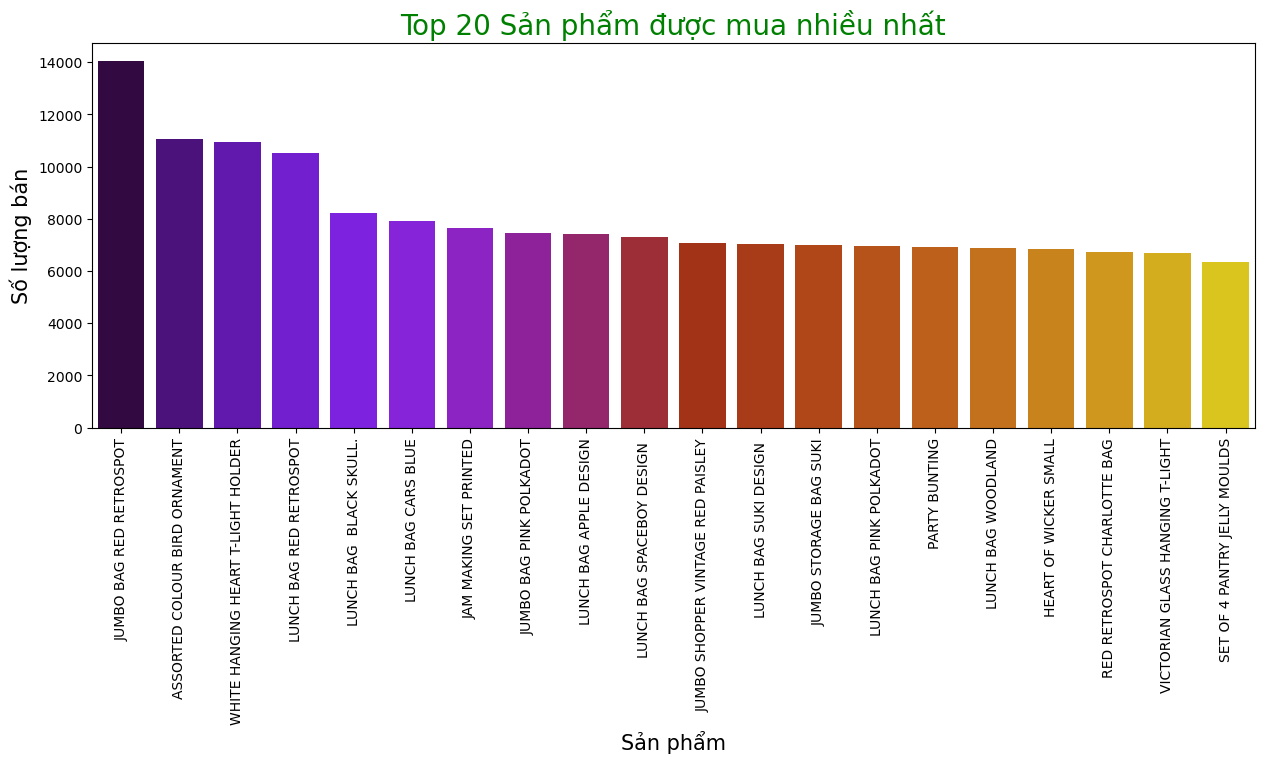

In [31]:

Item_df = df.groupby('Description')['Quantity'].sum()
Item_df=Item_df.sort_values(ascending=False)


plt.figure(figsize=(15,5))
sns.barplot(x = Item_df.head(20).index, y = Item_df.head(20).values, palette = 'gnuplot')
plt.xlabel('Sản phẩm', size = 15)
plt.xticks(rotation=90)
plt.ylabel('Số lượng bán', size = 15)
plt.title('Top 20 Sản phẩm được mua nhiều nhất', color = 'green', size = 20)
plt.show()

# 4. Luật kết hợp

# 4.1 Chuẩn hóa dữ liệu phục vụ cho việc tìm ra luật kết hợp


In [24]:
# lựa chọn khách hàng ở Vương Quốc Anh để tìm luật kết hợp
uk_df = df[df['Country']=='United Kingdom']
uk_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
541887,581585,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,4,2011-12-09 12:31:00,3.75,15804.0,United Kingdom,15.00,2011-12
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804.0,United Kingdom,11.40,2011-12
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40,2011-12
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,2011-12


In [26]:
# tạo ma trận mxn trong đó m=giao dịch và n=mục và mỗi hàng biểu thị liệu mục đó có trong giao dịch hay không
my_Item = transactions_str.pivot_table(index='InvoiceNo', columns='Description', values='Count', aggfunc='sum').fillna(0)
my_Item.head()

# pivot_table: Hàm này từ thư viện pandas được sử dụng để tạo bảng pivot từ DataFrame transactions_str.
# index='Transaction': Thiết lập cột 'Transaction' làm chỉ mục hàng của bảng pivot. Điều này có nghĩa là bảng sẽ được nhóm theo giao dịch.
# columns='Item': Thiết lập cột 'Item' làm nhãn cột của bảng pivot. Điều này tạo ra các cột riêng cho mỗi mục duy nhất.
# values='Count': Chỉ định rằng các giá trị trong cột 'Count' nên được sử dụng để điền vào các ô bảng pivot.
# aggfunc='sum': Xác định hàm tổng hợp được áp dụng cho các giá trị 'Count' trong mỗi nhóm giao dịch. 
# fillna(0): thay thế bất kỳ giá trị NaN (Not a Number) nào bằng 0.

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,TRELLIS COAT RACK,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,...,ZINC PLANT POT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:

def encode(x):
    if x<=0:
        return False
    if x>=1:
        return True
my_Item_sets = my_Item.applymap(encode)
my_Item_sets.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,TRELLIS COAT RACK,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,...,ZINC PLANT POT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 4.2 Tìm ra luật kết hợp với thuật toán apriori

In [29]:
# sử dụng thuật toán apriori with min_support=0.02 (2% of 411183 )
# Điều đó có nghĩa là mặt hàng đó phải xuất hiện trong ít nhất 8224 giao dịch trong số 411183  giao dịch
# frequent itemset là tập phổ biến các mặt hàng hay nhóm mặt hàng có sup>=0.01
frequent_items = apriori(my_Item_sets, min_support = 0.02,use_colnames = True)
frequent_items.head()

,support,itemsets
0,0.026115,(3 STRIPEY MICE FELTCRAFT)
1,0.023590,(4 TRADITIONAL SPINNING TOPS)
2,0.048842,(6 RIBBONS RUSTIC CHARM)
3,0.028209,(60 TEATIME FAIRY CAKE CASES)
4,0.023405,(72 SWEETHEART FAIRY CAKE CASES)


In [30]:
rules = association_rules(frequent_items, metric = 'lift', min_threshold = 1)
rules = rules[rules['confidence'] >= 0.5]
rules.sort_values(['confidence','lift'], ascending=False).reset_index(drop=True).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.030426,0.053092,0.027347,0.898785,16.928863,0.025731,9.355452,0.970457
1,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.032520,0.053585,0.027347,0.840909,15.693103,0.025604,5.948897,0.967749
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.039911,0.053092,0.032520,0.814815,15.347254,0.030401,5.113304,0.973704
3,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",(JUMBO BAG RED RETROSPOT),0.025868,0.102673,0.020510,0.792857,7.722153,0.017854,4.331923,0.893619
4,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.028578,0.102673,0.022050,0.771552,7.514645,0.019116,3.927922,0.892431
5,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.039911,0.053585,0.030426,0.762346,14.226948,0.028288,3.982319,0.968359
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.053092,0.053585,0.039172,0.737819,13.769230,0.036327,3.609779,0.979371
7,"(JUMBO STORAGE BAG SUKI, JUMBO SHOPPER VINTAGE...",(JUMBO BAG RED RETROSPOT),0.029071,0.102673,0.021434,0.737288,7.180930,0.018449,3.415632,0.886514
8,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.053585,0.053092,0.039172,0.731034,13.769230,0.036327,3.520556,0.979881
9,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.043237,0.050197,0.030365,0.702279,13.990436,0.028194,3.190247,0.970484


# kết luận
{PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER --> GREEN REGENCY TEACUP AND SAUCER}<br>
Mức hỗ trợ cho {PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER} là 0.030426, nghĩa là 3.04% giao dịch ở Vương quốc Anh chứa cả "PINK REGENCY TEACUP AND SAUCER" và "ROSES REGENCY TEACUP AND SAUCER"}. <br>
Mức hỗ trợ cho {GREEN REGENCY TEACUP AND SAUCER} là 0.053092, nghĩa là 5.3% giao dịch ở Vương quốc Anh có chứa GREEN REGENCY TEACUP AND SAUCER.<br>
Khách hàng mua {PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER} có 89% cơ hội mua được {GREEN REGENCY TEACUP AND SAUCER}.<br>
Chỉ số mức tăng đã chứng minh rằng sự liên kết không phải là ngẫu nhiên vì giá trị mức tăng của nó > 1.<br>
<br>
